In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

scores_lesion = pd.DataFrame.from_csv("/Users/Mahir/Documents/Personal/Comp Sci/analyzing_lesions/clinical_info.csv")
scores_lesion

,mse,total_lesions,max_lesion_volume,min_lesion_volume,total_volume_of_lesions,average_volume,median_volume,inf_total_lesions,inf_max_lesion_volume,inf_min_lesion_volume,...,sub_total_lesions,sub_max_lesion_volume,sub_min_lesion_volume,sub_total_volume_of_lesions,sub_average_volume,sub_median_volume,edss,dd,msfc 25 1,msfc 25 2
0,mse1,15,429.0,15.0,1661.0,110.733333,72.0,1,53.0,53.0,...,3,79.0,15.0,155.0,51.666667,61.0,3.5,35.0,6.3,6.1
1,mse1003,16,4427.0,44.0,9706.0,606.625000,108.5,0,0.0,0.0,...,7,4427.0,44.0,5092.0,727.428571,108.0,2.0,9.0,4.6,4.7
2,mse1009,6,81.0,40.0,346.0,57.666667,55.5,0,0.0,0.0,...,4,81.0,43.0,241.0,60.250000,58.5,2.0,15.0,3.8,3.6
3,mse1011,5,2154.0,23.0,2425.0,485.000000,96.0,0,0.0,0.0,...,4,2154.0,23.0,2329.0,582.250000,76.0,1.0,3.0,4.3,4.2
4,mse1017,3,123.0,72.0,310.0,103.333333,115.0,0,0.0,0.0,...,1,72.0,72.0,72.0,72.000000,72.0,0.0,0.0,4.0,4.2
5,mse1023,7,358.0,75.0,1250.0,178.571429,168.0,0,0.0,0.0,...,2,168.0,75.0,243.0,121.500000,121.5,1.5,5.0,4.3,4.2
6,mse1027,15,3584.0,19.0,10451.0,696.733333,336.0,0,0.0,0.0,...,5,3584.0,19.0,4031.0,806.200000,176.0,3.0,14.0,4.9,4.7
7,mse1033,18,1988.0,23.0,6286.0,349.222222,169.0,0,0.0,0.0,...,8,1111.0,23.0,1940.0,242.500000,132.0,4.5,29.0,6.0,5.4
8,mse1045,12,1193.0,20.0,2348.0,195.666667,56.0,0,0.0,0.0,...,8,243.0,20.0,699.0,87.375000,56.0,4.0,20.0,4.5,4.4
9,mse1048,9,60.0,22.0,331.0,36.777778,36.0,0,0.0,0.0,...,6,60.0,25.0,247.0,41.166667,37.5,0.0,3.0,5.0,4.8


398


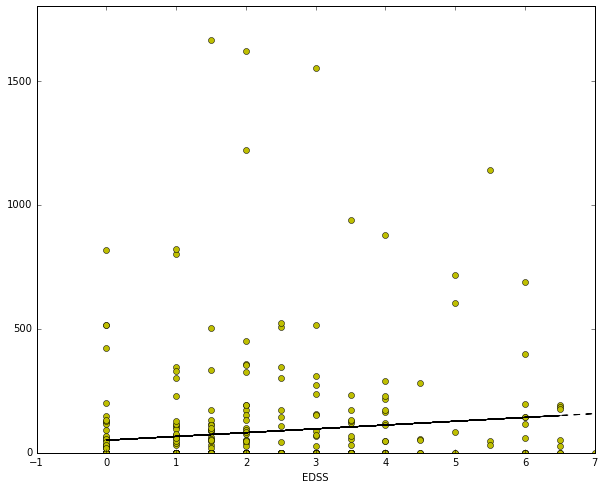

In [2]:
#set X and y values
X_values=scores_lesion[['inf_total_lesions','inf_total_volume_of_lesions']]
y_values=scores_lesion.edss

print len(scores_lesion.edss)

x = scores_lesion.edss
y = scores_lesion.inf_total_volume_of_lesions
fit = np.polyfit(x,y,1)
fit_fn=np.poly1d(fit)

plt.figure(figsize=(10,8))
plt.plot(x,y,'yo',x,fit_fn(x),'--k')
plt.xlabel('EDSS')
plt.xlim(-1,)
plt.ylim(-1,)
plt.show()

In [3]:
def scaler(data):
    adj_vals = []
    for x in range(len(data)):
        adj_vals.append(data[x]/max(data))
    return adj_vals

inf_data = scaler(scores_lesion.inf_total_volume_of_lesions)
per_data = scaler(scores_lesion.per_total_volume_of_lesions)
jux_data = scaler(scores_lesion.jux_total_volume_of_lesions)
sub_data = scaler(scores_lesion.sub_total_volume_of_lesions)

In [14]:
from sklearn import svm
from sklearn import cross_validation

clf = svm.SVR(kernel='linear', C = 0.03)
scores = cross_validation.cross_val_score(clf,X_values,y_values,cv=15,scoring='r2')
scores

array([-0.05251139, -0.19345945, -0.13460233,  0.1057207 ,  0.0195095 ,
       -0.18547835, -0.13270444, -0.08970187,  0.02544279, -0.0817104 ,
       -0.10286219, -0.04584049, -0.12900063,  0.03909867, -0.00581583])

from sklearn.metrics import roc_curve, auc
from sklearn import svm
from sklearn.cross_validation import StratifiedKFold
import pylab as plt

X, y = X_values[y_values!=2], y_values[y_values!=2]
n_samples,n_features = X.shape
X = np.c_[X]
print X.shape

cv = StratifiedKFold(y,n_folds=5)
classifier = svm.SVC(kernel='linear',probability=True)
mean_tpr = 0.0
mean_fpr = np.linspace(0,1,100)
all_tpr = []

for i, (train,test) in enumerate(cv):
    print "what"
    prob1 = classifier.fit(X[train],y[train])
    print "this is done"
    probas_ = prob1.predict_proba(X[test])
    print "this is also done"
    fpr,tpr,thresholds=roc_curve(y[test],probas_[:,1])
    mean_tpr += interp(mean_fpr,fpr,tpr)
    mean_tpr[0]=0.0
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr,lw=1,label="ROC fold %d (area= %0.2f)" %(i,roc_auc))

plt.plot([0,1],[0,1],color='gray',label='Luck')

mean_tpr /= len(cv)
mean_tpr[-1]=1.0
mean_auc=auc(mean_fpr,mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',label="Mean ROC (area=%0.2f)" % mean_auc, lw=2)

plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

from sklearn.cross_validation import train_test_split,KFold
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import pylab as plt

n_samples, n_features = X_values.shape
n_digits = len(np.unique(y_values))
print "Samples: %s  Features: %s" % (n_samples, n_features)

reduced_data = PCA(n_components = 2).fit_transform(X_values)
kmean = KMeans(n_clusters = n_digits,n_init = 3)
kmean.fit(reduced_data)

h = .02
x_min,x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max()+1
y_min,y_max = reduced_data[:,1].min()-1, reduced_data[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

Z = kmean.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()), cmap=plt.cm.Paired,aspect='auto', origin='lower')
plt.plot(reduced_data[:,0], reduced_data[:,1], 'k.',markersize=10)
centroids = kmean.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=169,linewidths=3,color='w',zorder=10)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks(())
plt.yticks(())
plt.show()